In [1]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

In [2]:
class cnn:
    def __init__(self):
        self.batch_size = 128
        self.dir_data='data/'
        self.num_of_classes,self.dict =create_dic(self.dir_data)
        self.image_size = 28
        self.validate_data = 10000

In [3]:
with open('mini_classes.txt','w') as f:
    for file in sorted(os.listdir('data/')):
        if file.endswith(".npy"):
            print(file.split(".")[0], file = f)
f = open("mini_classes.txt","r")
# And for reading use
classes = f.readlines()
f.close()
classes = [c.replace('\n','').replace(' ','_') for c in classes]

In [4]:
classes

['ambulance',
 'apple',
 'axe',
 'basketball',
 'bicycle',
 'boomerang',
 'butterfly',
 'car',
 'carrot',
 'cat',
 'chair',
 'clock',
 'cookie',
 'cup',
 'donut',
 'envelope',
 'flower',
 'key',
 'knife',
 'lightning',
 'pencil',
 'pizza',
 'rainbow',
 'snake',
 'spider',
 'star',
 'tractor',
 'tree',
 'whale',
 'windmill']

In [5]:
def create_dic(dir_data):
    dict={}
    i=0
    for file in sorted(os.listdir(dir_data)):
        if file.endswith(".npy"):
            str=file.split(".")
            dict[i]=str[0]
            i=i+1
    return i,dict

In [6]:
def load_data(cnn):
    dir_data='data/'
    num_of_classess,dict=create_dic(dir_data)
    data_l=np.zeros((1))
    data_d=np.zeros((1,cnn.image_size*cnn.image_size))
    index=0
    class_names = []
    for file in sorted(os.listdir(dir_data)):
        if file.endswith(".npy"):
            print(data_l.shape,data_d.shape,"cur label num!",index+1,file)
            curr_data=np.load(dir_data+file)
            data_size=curr_data.shape
            #take only 30 percent of the data
            part_data=int(0.3*(data_size[0]))
            curr_data=curr_data[1:part_data,:]
            

            #change to white background
            curr_data=255-curr_data;
            data_d=np.concatenate((data_d,curr_data), axis=0)
            data_l=np.concatenate((data_l,np.ones(curr_data.shape[0])*index))
            index=index+1
            class_names.append(file.split('.')[0])

    data_l=np.expand_dims(data_l,1)
    data_all=np.concatenate((data_d,data_l),axis=1)
    data_all=np.random.permutation(data_all)

    x_data=data_all[:,0:-1]
    y_data=data_all[:,-1]
    num_img=x_data.shape[0]
    data_img=np.reshape(x_data,[num_img,cnn.image_size,cnn.image_size])


    data_train=data_img[cnn.validate_data:,:,:]
    data_train=np.expand_dims(data_train,3)

    labels_train=y_data[cnn.validate_data:]
    data_test=data_img[:cnn.validate_data:,:,:]
    data_test=np.expand_dims(data_test,3)

    labels_test=y_data[:cnn.validate_data]


    return data_train,labels_train,data_test,labels_test,class_names

In [7]:
quick_draw_cnn=cnn()
x_train, y_train, x_test, y_test, class_names = load_data(quick_draw_cnn)
num_classes = len(class_names)

(1,) (1, 784) cur label num! 1 ambulance.npy
(44401,) (44401, 784) cur label num! 2 apple.npy
(87816,) (87816, 784) cur label num! 3 axe.npy
(125051,) (125051, 784) cur label num! 4 basketball.npy
(165187,) (165187, 784) cur label num! 5 bicycle.npy
(203144,) (203144, 784) cur label num! 6 boomerang.npy
(245947,) (245947, 784) cur label num! 7 butterfly.npy
(281345,) (281345, 784) cur label num! 8 car.npy
(336173,) (336173, 784) cur label num! 9 carrot.npy
(375909,) (375909, 784) cur label num! 10 cat.npy
(412868,) (412868, 784) cur label num! 11 chair.npy
(479678,) (479678, 784) cur label num! 12 clock.npy
(515837,) (515837, 784) cur label num! 13 cookie.npy
(555241,) (555241, 784) cur label num! 14 cup.npy
(594456,) (594456, 784) cur label num! 15 donut.npy
(636680,) (636680, 784) cur label num! 16 envelope.npy
(677137,) (677137, 784) cur label num! 17 flower.npy
(720581,) (720581, 784) cur label num! 18 key.npy
(768869,) (768869, 784) cur label num! 19 knife.npy
(820664,) (820664, 7

car


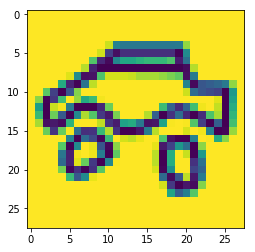

In [9]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

In [10]:
x_train = x_train.reshape(x_train.shape[0], quick_draw_cnn.image_size, quick_draw_cnn.image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], quick_draw_cnn.image_size, quick_draw_cnn.image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(filters=32, kernel_size=[5,5], padding='same',input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(layers.Convolution2D(filters=32, kernel_size=[5,5],padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(layers.Convolution2D(filters=32, kernel_size=[5,5],padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(layers.Convolution2D(filters=32, kernel_size=[5,5],padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(units=500, activation='relu'))
model.add(layers.Dense(units=num_classes, activation='softmax')) 
# Train model
adam = tf.train.AdamOptimizer()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          25632     
__________

In [13]:
model.fit(x = x_train, y = y_train, validation_data=(x_test, y_test), batch_size=quick_draw_cnn.batch_size, epochs=10)
acc = model.evaluate(x_test, y_test,batch_size=quick_draw_cnn.batch_size)
print('Test accuracy:', acc[1])

Train on 1260247 samples, validate on 10000 samples
Epoch 1/10
1260247/1260247 [==============================] - 42s 34us/step - loss: 0.3436 - top_k_categorical_accuracy: 0.9779 - val_loss: 0.3506 - val_top_k_categorical_accuracy: 0.9771
Epoch 2/10
1260247/1260247 [==============================] - 42s 34us/step - loss: 0.3225 - top_k_categorical_accuracy: 0.9792 - val_loss: 0.3391 - val_top_k_categorical_accuracy: 0.9792
Epoch 3/10
1260247/1260247 [==============================] - 43s 34us/step - loss: 0.3104 - top_k_categorical_accuracy: 0.9800 - val_loss: 0.3174 - val_top_k_categorical_accuracy: 0.9786
Epoch 4/10
1260247/1260247 [==============================] - 42s 34us/step - loss: 0.3013 - top_k_categorical_accuracy: 0.9806 - val_loss: 0.3287 - val_top_k_categorical_accuracy: 0.9780
Epoch 5/10
1260247/1260247 [==============================] - 42s 34us/step - loss: 0.2953 - top_k_categorical_accuracy: 0.9809 - val_loss: 0.3067 - val_top_k_categorical_accuracy: 0.9787
Epoch 6/

['lightning', 'axe', 'boomerang', 'star', 'rainbow']


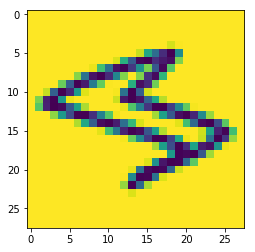

In [22]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

In [23]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

In [24]:
model.save('keras.h5')

In [26]:
!pip install --upgrade pip

  Using cached https://files.pythonhosted.org/packages/c2/d7/90f34cb0d83a6c5631cf71dfe64cc1054598c843a92b400e55675cc2ac37/pip-18.1-py2.py3-none-any.whl
  Found existing installation: pip 18.0
    Uninstalling pip-18.0:
Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/share/pkg/python/3.6.2/install/bin/pip'
Consider using the `--user` option or check the permissions.

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [40]:
!tensorflowjs_converter --input_format keras keras.h5 model/

Using TensorFlow backend.
